In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA Part

In [298]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [301]:
df_train["Sex"] = df_train["Sex"].apply(lambda x: 1 if x=="male" else 0)
df_train = df_train.rename(columns={"Sex": "IsMale"})

In [ ]:
df_train = df_train.drop(columns=["Name", "PassengerId", "Cabin", "Ticket"])
df_train.head()

,Survived,Pclass,IsMale,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [303]:
df_train.nunique()

Survived      2
Pclass        3
IsMale        2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

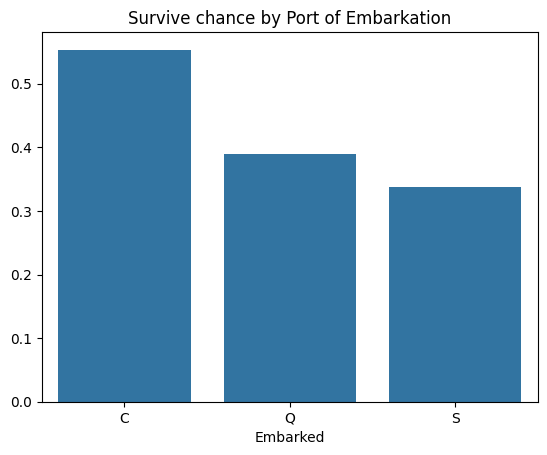

,Survived,Pclass,IsMale,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [305]:
sns.barplot(df_train[df_train["Survived"] == 1].groupby("Embarked").size() / df_train.groupby("Embarked").size())
plt.title("Survive chance by Port of Embarkation")
plt.show()
df_train["Embarked"] = df_train["Embarked"].apply(lambda x: 0 if x == 'C' else 1 if x=='Q' else 2)
df_train.head()

<Axes: >

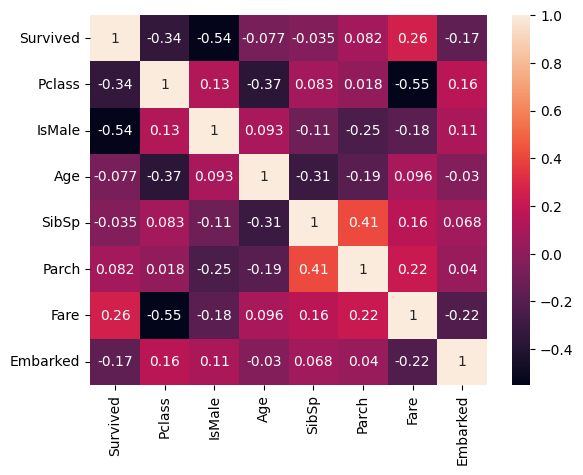

In [306]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

<Axes: title={'center': 'Correlation with survived'}>

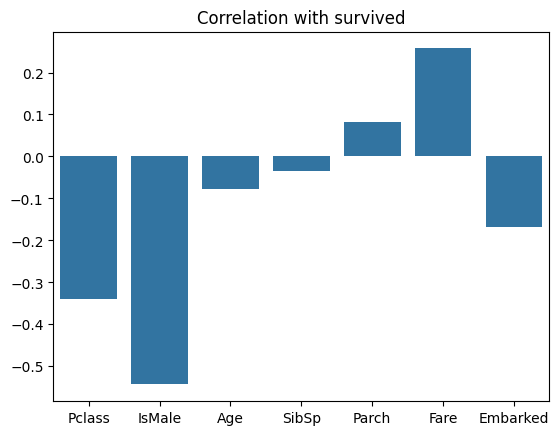

In [307]:
plt.title("Correlation with survived")
sns.barplot(df_train.drop(columns=["Survived"]).corrwith(numeric_only=True, other=df_train["Survived"]))
